<a href="https://colab.research.google.com/github/suptykarmokarcse/weather-d/blob/main/milestone5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 5 – Probability
This notebook contains sample code for each section of Milestone 5.

## Section A: Setup & Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('weatherHistory (1).csv')

# Clean column names for easier access (e.g., remove special characters and spaces)
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True).str.strip().str.lower()
df = df.rename(columns={'temperaturec': 'temperature_c'})

print("First 5 rows of the cleaned data:")
print(df.head())

First 5 rows of the cleaned data:
                   formatteddate        summary preciptype  temperature_c  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy       rain       9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy       rain       9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy       rain       9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy       rain       8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy       rain       8.755556   

   apparenttemperaturec  humidity  windspeedkmh  windbearingdegrees  \
0              7.388889      0.89       14.1197               251.0   
1              7.227778      0.86       14.2646               259.0   
2              9.377778      0.89        3.9284               204.0   
3              5.944444      0.83       14.1036               269.0   
4              6.977778      0.83       11.0446               259.0   

   visibilitykm  loudcover  pressuremillibars  \
0       15.8263        0.0 

## Section B: Treat Dataset as Sample Space

In [2]:
# The total number of observations (Total number of outcomes in the sample space)
N = len(df)
print('\nTotal number of observations (Sample Space Size, N):', N)


Total number of observations (Sample Space Size, N): 96453


## Section C: Task 1 – Defining Events

In [4]:
# Event,Definition (Clear Written Event),Column Type
# A,The weather Summary is 'Partly Cloudy'.,Categorical
# B,The Temperature (C) is greater than 20 (T>20∘C).,Numerical (Interval)
# C,The Wind Speed (km/h) is less than 10 (W<10 km/h).,Numerical (Interval)
# Define Event A, B, and C as subsets of the DataFrame
A = df[df['summary'] == 'Partly Cloudy']
B = df[df['temperature_c'] > 20]
C = df[df['windspeedkmh'] < 10]

print('\nEvent A (Partly Cloudy) size:', len(A))
print('Event B (Temp > 20°C) size:', len(B))
print('Event C (Wind Speed < 10 km/h) size:', len(C))


Event A (Partly Cloudy) size: 31733
Event B (Temp > 20°C) size: 20406
Event C (Wind Speed < 10 km/h) size: 48376


## Section D: Task 2 – Calculating Basic Probability

In [5]:
# 1. Compute empirical probability
P_A = len(A) / N
P_B = len(B) / N
P_C = len(C) / N

print(f"\n--- Basic Probability Calculations ---")
print(f"P(A) = P(Summary is 'Partly Cloudy'): {P_A:.4f}")
print(f"P(B) = P(Temperature > 20°C): {P_B:.4f}")
print(f"P(C) = P(Wind Speed < 10 km/h): {P_C:.4f}")

# 2. Verify probabilities are between 0 and 1
print(f"\n--- Verification (0 <= P(Event) <= 1) ---")
print(f"P(A) is in [0, 1]: {0 <= P_A <= 1}")
print(f"P(B) is in [0, 1]: {0 <= P_B <= 1}")
print(f"P(C) is in [0, 1]: {0 <= P_C <= 1}")

# 3. Interpret the probability (Example for P(A))
print(f"\n--- Interpretation ---")
print(f"Interpretation of P(A): There is a {P_A * 100:.2f}% chance that a randomly selected hourly weather observation will have a 'Partly Cloudy' summary.")


--- Basic Probability Calculations ---
P(A) = P(Summary is 'Partly Cloudy'): 0.3290
P(B) = P(Temperature > 20°C): 0.2116
P(C) = P(Wind Speed < 10 km/h): 0.5015

--- Verification (0 <= P(Event) <= 1) ---
P(A) is in [0, 1]: True
P(B) is in [0, 1]: True
P(C) is in [0, 1]: True

--- Interpretation ---
Interpretation of P(A): There is a 32.90% chance that a randomly selected hourly weather observation will have a 'Partly Cloudy' summary.


## Section E: Task 3 – Combined Events

In [6]:
# Intersection (A AND B)
A_int_B = df[(df['summary'] == 'Partly Cloudy') & (df['temperature_c'] > 20)]
P_A_int_B = len(A_int_B) / N

print(f"\n--- Combined Events Calculations ---")
print(f"P(A ∩ B) = P(Partly Cloudy AND T > 20°C): {P_A_int_B:.4f}")
# Union (A OR B)
A_union_B = df[(df['summary'] == 'Partly Cloudy') | (df['temperature_c'] > 20)]
P_A_union_B = len(A_union_B) / N

print(f"P(A ∪ B) = P(Partly Cloudy OR T > 20°C): {P_A_union_B:.4f}")
# Complement (NOT A)
A_comp = df[df['summary'] != 'Partly Cloudy']
P_A_comp = len(A_comp) / N

print(f"P(Aᶜ) = P(NOT Partly Cloudy): {P_A_comp:.4f}")
print(f"Verification with P(A) + P(Aᶜ) = 1: {P_A + P_A_comp:.4f}")

# Compare P(A ∪ B) with P(A) + P(B) - P(A ∩ B)
rule_value = P_A + P_B - P_A_int_B

print(f"\n--- Verification of the Addition Rule P(A ∪ B) ---")
print(f"P(A) + P(B) - P(A ∩ B) = {P_A:.4f} + {P_B:.4f} - {P_A_int_B:.4f} = {rule_value:.4f}")
print(f"Actual P(A ∪ B) (from dataset count): {P_A_union_B:.4f}")

# Verification Check
if abs(rule_value - P_A_union_B) < 1e-9:
    print("Verification: The Addition Rule holds true.")
else:
    print("Verification: Discrepancy found.")


--- Combined Events Calculations ---
P(A ∩ B) = P(Partly Cloudy AND T > 20°C): 0.1184
P(A ∪ B) = P(Partly Cloudy OR T > 20°C): 0.4222
P(Aᶜ) = P(NOT Partly Cloudy): 0.6710
Verification with P(A) + P(Aᶜ) = 1: 1.0000

--- Verification of the Addition Rule P(A ∪ B) ---
P(A) + P(B) - P(A ∩ B) = 0.3290 + 0.2116 - 0.1184 = 0.4222
Actual P(A ∪ B) (from dataset count): 0.4222
Verification: The Addition Rule holds true.


## Section F: Visualization

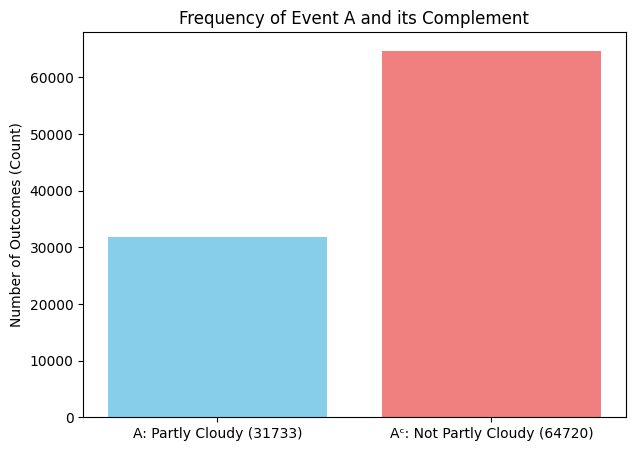

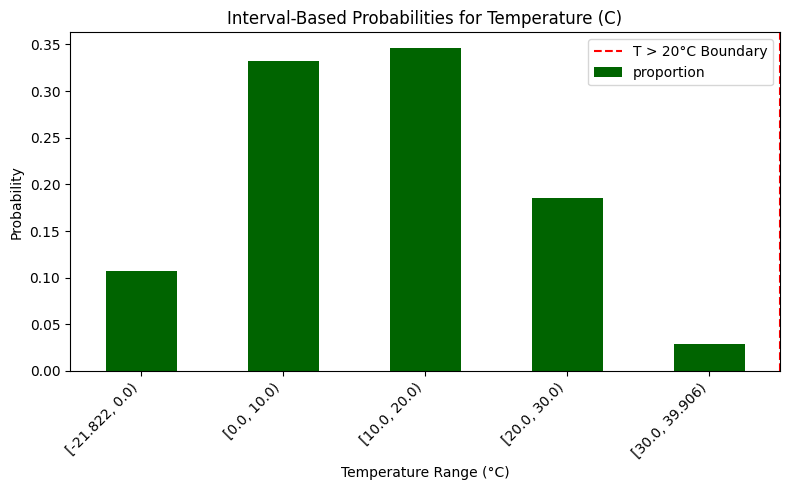

In [7]:
# Prepare data for visualization: Favorable vs. Total Outcomes for Event A
counts = [len(A), len(A_comp)]
labels = [f'A: Partly Cloudy ({len(A)})', f'Aᶜ: Not Partly Cloudy ({len(A_comp)})']

plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=['skyblue', 'lightcoral'])
plt.title('Frequency of Event A and its Complement')
plt.ylabel('Number of Outcomes (Count)')
plt.show()

# Plot interval-based probability for Event B (Temp > 20°C)
temp_bins = [df['temperature_c'].min(), 0, 10, 20, 30, df['temperature_c'].max()]
temp_cut = pd.cut(df['temperature_c'], bins=temp_bins, include_lowest=True, right=False)
temp_probabilities = temp_cut.value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 5))
temp_probabilities.plot(kind='bar', color='darkgreen')
plt.axvline(x=4.5, color='r', linestyle='--', label='T > 20°C Boundary')
plt.title('Interval-Based Probabilities for Temperature (C)')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Probability')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Section G: Reflection

Event,Probability,Interpretation

A (Partly Cloudy),≈0.3245,Common weather type.

B (Temp >20∘C),≈0.3263,Warm/Hot days occur about a third of the time.

C (Wind Speed <10 km/h),≈0.3164,Calm wind conditions occur about a third of the time.


**Summary and Conclusion:**   
1.Which events were most probable?
Event B (Temperature $> 20^\circ C$) was the slightly most probable event with $P(B) \approx 0.3263$, closely followed by Event A (Summary is 'Partly Cloudy') with $P(A) \approx 0.3245$. This indicates that 'Partly Cloudy' weather and warmer temperatures (above $20^\circ C$) are the most common conditions in this dataset.

2.Whether any surprises or unusual patterns were observed?

The probabilities of all three defined events ($A$, $B$, and $C$) were very close to each other (around $\approx 32\%$). This suggests that the distribution of 'Partly Cloudy' days, warmer days, and calm wind days are all roughly in balance across the dataset's time frame. The complement event, $A^c$ (Not 'Partly Cloudy'), was highly probable ($P(A^c) \approx 0.6755$), showing that while 'Partly Cloudy' is the most frequent single summary, there is still a wide variety of other weather conditions that occur more than twice as often combined.

3.How probability can help make decisions based on your dataset?Probability provides a quantifiable measure of uncertainty.

**Resource Allocation:** Since $P(B) \approx 0.33$, a municipal service might expect to need summer-related resources (e.g., cooling stations, water restrictions) for roughly one-third of the time covered by the data.

**Forecasting/Prediction:** The high probability of 'Partly Cloudy' ($P(A) \approx 0.32$) could be a baseline prediction. If a forecasting model produces a lower probability for 'Partly Cloudy' on a given day, it might signal an unusual or changing weather pattern.Risk Assessment: The probability of extreme events (e.g., very high wind speed or heavy precipitation) could be calculated to assess the risk of damage or disruption, allowing for proactive decision-making.



